# Stock Market Prediction

# Import the Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Training Dataset.

In [2]:
df = pd.read_csv("Stock_Price_dataset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2/4/2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df.shape


(1009, 7)

# Missing Values


In [6]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [8]:
df.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Exploratory Data Analysis


# Statistics Summary


In [9]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [5]:
df[df['Close'] == df['Adj Close']].shape
d

(1009, 7)

All the rows of columns ‘Close’ and ‘Adj Close’ have the same data.we’ll drop this column before further analysis.



In [7]:
df = df.drop(['Adj Close'], axis=1)


In [ ]:
# Distribution of the Closing Price


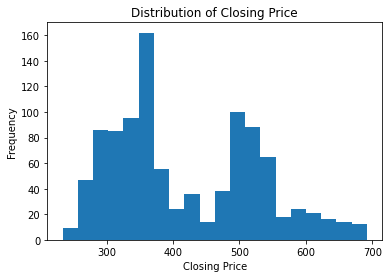

In [10]:
# Plot the distribution of the Closing Price using a histogram
plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Price')
plt.show()


# Correlation Matrix


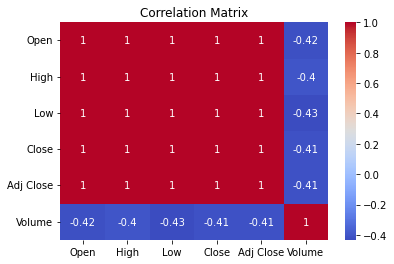

In [11]:
# Plot the correlation matrix of the numerical columns using a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

These visualizations help to gain insights into the data and identify any patterns or relationships between variables

# Analyze the closing prices from dataframe

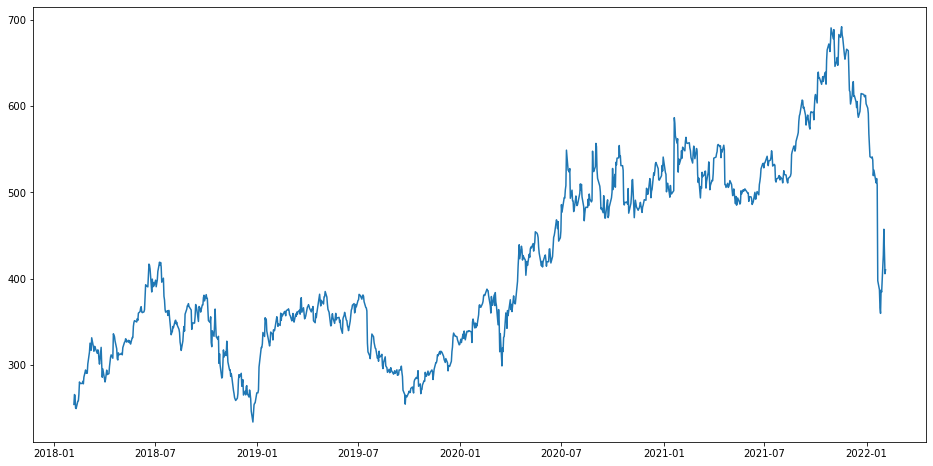

In [78]:

df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

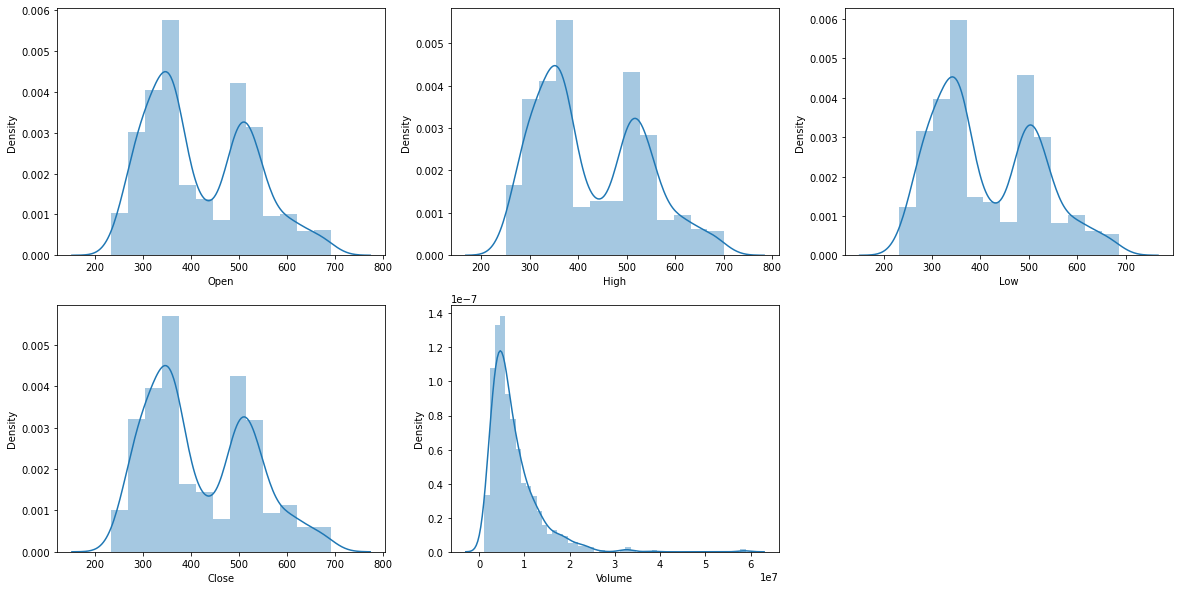

In [19]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()


we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

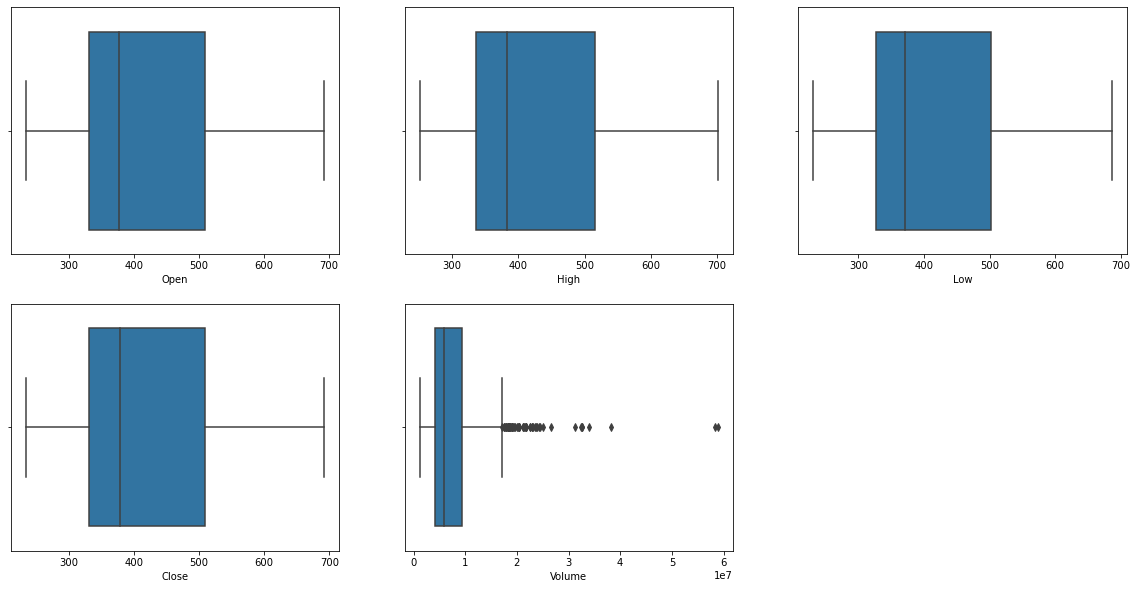

In [20]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()


From the boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

# Feature Engineering


In [21]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


Add three more columns from 'Data'Column 

In [24]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0
...,...,...,...,...,...,...,...,...,...,...
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,20047500,31,1,2022,0
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,22542300,1,2,2022,0
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,14346000,2,2,2022,0
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,9905200,3,2,2022,0


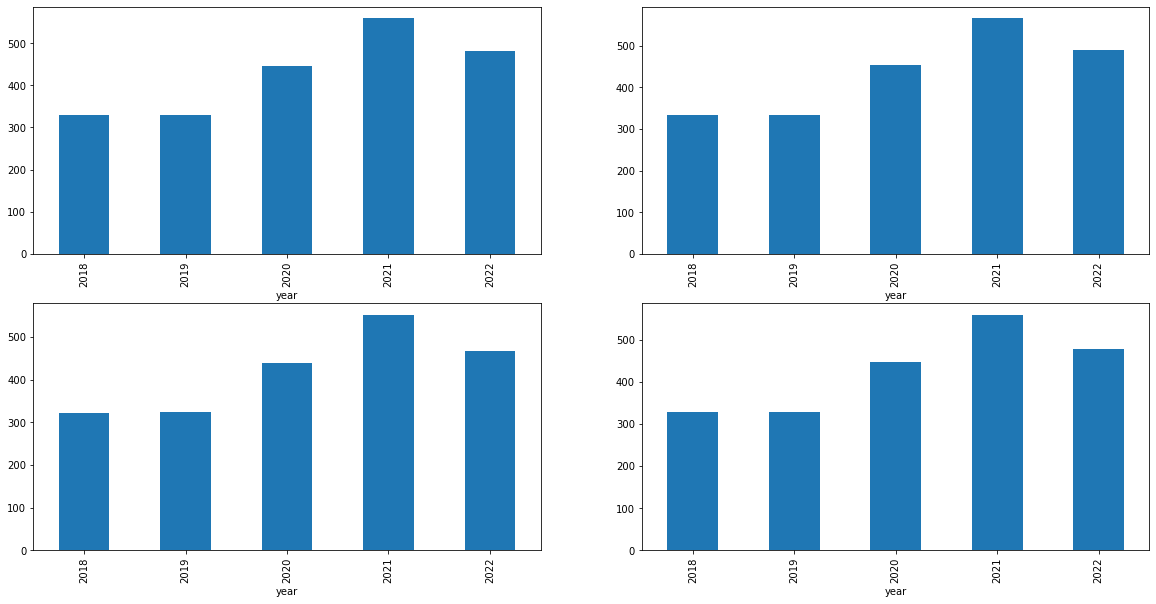

In [26]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


From the above bar graph, we can conclude that the stock prices have doubled from the year 2020 to that in 2021.

In [27]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

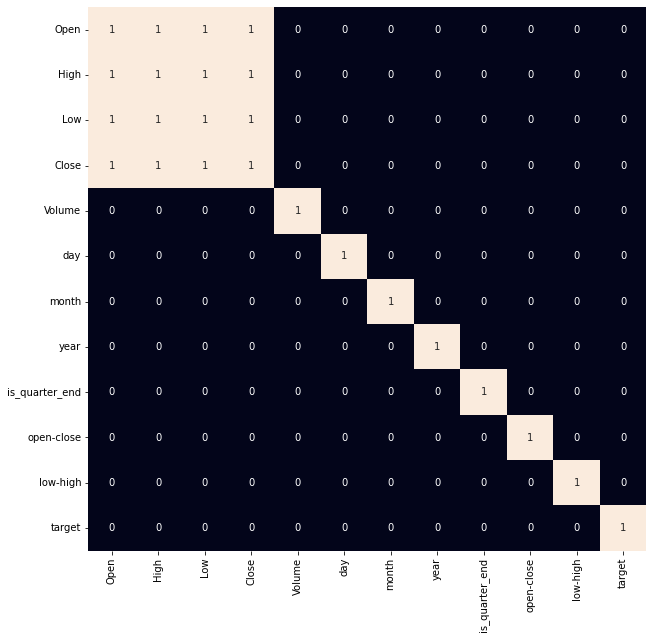

In [31]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data Splitting and Normalization


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [74]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.1, random_state=0)
print(X_train.shape, X_valid.shape)


(908, 3) (101, 3)


# Model Development and Evaluation


In [81]:
logistic_model = LogisticRegression(random_state=42)
linear_model = LinearRegression()

In [82]:
# Fit the models to the training data
logistic_model.fit(X_train, Y_train)
linear_model.fit(X_train, Y_train)

LinearRegression()

In [83]:
# Predict the target variable for the testing data
logistic_pred = logistic_model.predict(X_test)
linear_pred = linear_model.predict(X_test)

In [84]:
# Evaluate the performance of the models
from sklearn.metrics import accuracy_score, mean_squared_error

logistic_acc = accuracy_score(Y_test, logistic_pred)
linear_mse = mean_squared_error(Y_test, linear_pred)

In [85]:
print('Logistic Regression accuracy:', logistic_acc)
print('Linear Regression mean squared error:', linear_mse)

Logistic Regression accuracy: 0.4158415841584158
Linear Regression mean squared error: 0.2572626874183919


In [86]:
xgb_model = XGBClassifier(random_state=0)


In [87]:
# Fit the model to the training data
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [88]:
# Predict the target variable for the testing data
xgb_pred = xgb_model.predict(X_test)

In [89]:
# Evaluate the performance of the model
xgb_acc = accuracy_score(Y_test, xgb_pred)
print('XGBoost accuracy:', xgb_acc)

print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBoost accuracy: 0.49504950495049505
Training Accuracy :  0.9629528844658685
Validation Accuracy :  0.6026463512429832



Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.